In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

## 1. 기본 예제

#### (1) 샘플 1 

+ 3 * 3 * 1 * 1 이미지 준비
+ 2 * 2 * 1 필터 준비

(1, 3, 3, 1)


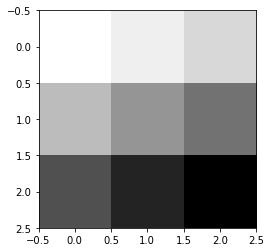

In [3]:
image = np.array([[[[1], [2], [3]],
                  [[4], [5], [6]],
                 [[7], [8], [9]]]], dtype=np.float32)

print(image.shape)
plt.imshow(image.reshape(3, 3), cmap="Greys")

(2, 2, 1, 1)
(1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


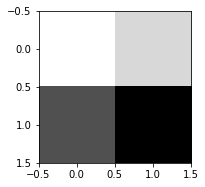

In [9]:
# padding없이 convolution layer 추출

filter = tf.constant([[[[1.]], [[1.]]], [[[1.]], [[1.]]]])
print(filter.shape)

conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding="VALID")

sess = tf.Session()
conv2d_img = sess.run(conv2d)
print(conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2, 2))
    plt.subplot(1, 2, i + 1)
    plt.imshow(one_img.reshape(2, 2), cmap="Greys")

(2, 2, 1, 1)
(1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


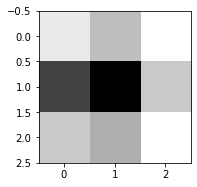

In [10]:
# padding을 이용한 convolution layer 추출

filter = tf.constant([[[[1.]], [[1.]]], [[[1.]], [[1.]]]])
print(filter.shape)

conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding="SAME")

sess = tf.Session()
conv2d_img = sess.run(conv2d)
print(conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 2, i + 1)
    plt.imshow(one_img.reshape(3, 3), cmap="Greys")

+ 3개의 필터 사용 : 2 * 2 * 1  * 3

(2, 2, 1, 3)
(1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


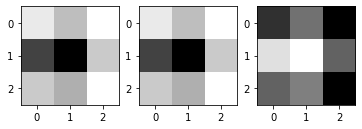

In [11]:
filter = tf.constant([[[[1., 10, -1]], [[1., 10, -1]]], [[[1., 10, -1]], [[1., 10, -1]]]])
print(filter.shape)

conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding="SAME")

sess = tf.Session()
conv2d_img = sess.run(conv2d)
print(conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 3, i + 1)
    plt.imshow(one_img.reshape(3, 3), cmap="Greys")

+ MaxPooling : 2 * 2 필터
+ padding 없음

In [14]:
image2 = tf.constant([[[[4], [3]], 
                       [[2], [1]]]]) 
print(image2.shape)

pool = tf.nn.max_pool(image2, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding="VALID")

sess = tf.Session()
p = sess.run(pool)
print(p.shape)
print(p)

(1, 2, 2, 1)
(1, 1, 1, 1)
[[[[4]]]]


In [15]:
# padding이 있을 경우

image2 = tf.constant([[[[4], [3]], 
                       [[2], [1]]]]) 
print(image2.shape)

pool = tf.nn.max_pool(image2, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding="SAME")

sess = tf.Session()
p = sess.run(pool)
print(p.shape)
print(p)

(1, 2, 2, 1)
(1, 2, 2, 1)
[[[[4]
   [3]]

  [[2]
   [1]]]]


## 2. 사례 1 : MNIST를 이용한 CNN

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


(784,)


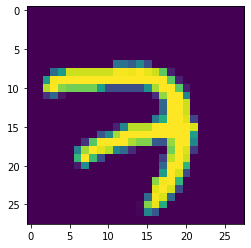

In [18]:
##### 데이터 확인

img = mnist.train.images[0]
print(img.shape)

plt.imshow(img.reshape(28, 28))

In [20]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

##### (1) 첫번째 convolution layer
 
+ 필터
    - 크기 : 3 * 3
    - 갯수 : 32
    - 색상 수 : 1

In [21]:
# 원본 이미지 준비
origin_X = tf.reshape(X, [-1, 28, 28, 1])

# 필터 준비
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))

# convolution layer
Layer1 = tf.nn.conv2d(origin_X, W1, strides=[1, 1, 1, 1], padding="SAME")
print(Layer1)

Layer1 = tf.nn.relu(Layer1)
print(Layer1)

Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)


##### (2) 첫번째  Pooling

+ 필터 크기 : 2 * 2
+ stride : 2
+ padding 사용

In [22]:
Layer1 = tf.nn.max_pool(Layer1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
print(Layer1)

Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)


##### (3) 두번째 convolution layer
 
+ 필터
    - 크기 : 3 * 3
    - 갯수 : 64
    - 색상 수 : 1

In [23]:
# 필터 준비
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))

# convolution layer
Layer2 = tf.nn.conv2d(Layer1, W2, strides=[1, 1, 1, 1], padding="SAME")
print(Layer2)

Layer2 = tf.nn.relu(Layer2)
print(Layer2)

Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)


##### (4) 두번째  Pooling

+ 필터 크기 : 2 * 2
+ stride : 2
+ padding 사용

In [24]:
Layer2 = tf.nn.max_pool(Layer2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
print(Layer2)

Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)


##### (5) FC(Fully Connected) Layer : Dense Layer

In [14]:
##### Hyper Parameter 준비
lr = 0.001
training_epochs = 20
batch_size = 500

##### Tensorflow Graph

Layer2 = tf.reshape(Layer2, [-1, 7*7*64])

W3 = tf.Variable(tf.random_normal([7*7*64, 10]))
b3 = tf.Variable(tf.random_normal([10]))

# 비용
logit = tf.matmul(Layer2, W3) + b3
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=y))

# 최저비용
train = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)

##### Tensor Graph 실행
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples / batch_size)
    avg_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, c = sess.run([train, cost], feed_dict={X:batch_xs, y:batch_ys})
        avg_cost += c/total_batch
        
    print("Epoch:", "%04d"%(epoch+1), "cost=", "{:.9f}".format(avg_cost))

Epoch: 0001 cost= 0.648146129
Epoch: 0002 cost= 0.164910100
Epoch: 0003 cost= 0.115340146
Epoch: 0004 cost= 0.090636636
Epoch: 0005 cost= 0.078891712
Epoch: 0006 cost= 0.068908919
Epoch: 0007 cost= 0.060317254
Epoch: 0008 cost= 0.055345197
Epoch: 0009 cost= 0.051101116
Epoch: 0010 cost= 0.047111422
Epoch: 0011 cost= 0.041696949
Epoch: 0012 cost= 0.039080368
Epoch: 0013 cost= 0.035484157
Epoch: 0014 cost= 0.032615339
Epoch: 0015 cost= 0.031152484
Epoch: 0016 cost= 0.030585170
Epoch: 0017 cost= 0.027643804
Epoch: 0018 cost= 0.025734932
Epoch: 0019 cost= 0.023253504
Epoch: 0020 cost= 0.022838901


In [17]:
correct_prediction = tf.equal(tf.argmax(logit, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9836


##### (6) Deep & Wide FC

+ 레이어는 총 3개 사용, 입출력 갯수 128개 사용
+ xavier 초기화 사용
+ dropout 사용 : 70% 유지
+ training_epoch : 15
+ batch_size : 100

In [25]:
##### Hyper Parameter 준비
lr = 0.001
training_epochs = 15
batch_size = 100
prob = tf.placeholder(tf.float32)

##### Tensorflow Graph

Layer3 = tf.reshape(Layer2, [-1, 7*7*64])

# 첫번째 레이어
W3 = tf.get_variable("W3", shape=[7*7*64, 128], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([128]))
logit3 = tf.matmul(Layer3, W3) + b3
Layer3 = tf.nn.relu(logit3)
Layer3 = tf.nn.dropout(Layer3, keep_prob=prob)

# 두번째 레이어
W4 = tf.get_variable("W4", shape=[128, 128], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([128]))
logit4 = tf.matmul(Layer3, W4) + b4
Layer4 = tf.nn.relu(logit4)
Layer4 = tf.nn.dropout(Layer4, keep_prob=prob)

# 세번째 레이어
W5 = tf.get_variable("W5", shape=[128, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logit = tf.matmul(Layer4, W5) + b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=y))

# 최저비용
train = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)

##### Tensor Graph 실행
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples / batch_size)
    avg_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, c = sess.run([train, cost], feed_dict={X:batch_xs, y:batch_ys, prob:0.7})
        avg_cost += c/total_batch
        
    print("Epoch:", "%04d"%(epoch+1), "cost=", "{:.9f}".format(avg_cost))

Epoch: 0001 cost= 0.531075785
Epoch: 0002 cost= 0.148436043
Epoch: 0003 cost= 0.106831873
Epoch: 0004 cost= 0.085093471
Epoch: 0005 cost= 0.072083234
Epoch: 0006 cost= 0.062674028
Epoch: 0007 cost= 0.054727326
Epoch: 0008 cost= 0.050000663
Epoch: 0009 cost= 0.044332380
Epoch: 0010 cost= 0.041123823
Epoch: 0011 cost= 0.036182434
Epoch: 0012 cost= 0.033744271
Epoch: 0013 cost= 0.032280615
Epoch: 0014 cost= 0.029249649
Epoch: 0015 cost= 0.027009699


In [26]:
correct_prediction = tf.equal(tf.argmax(logit, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, y: mnist.test.labels, prob:1}))

Accuracy: 0.9911


## 3. 사례 2 : 교통 표지판을 이용한 CNN

+ https://benchmark.ini.rub.de/gtsrb_dataset.html
    - GTSRB_Final_Test_Images.zip
    - GTSRB_Final_Training_Images.zip
    
    
    
+ 이미지(32 * 32) > Conv Layer1(Pooling) > Conv Layer2(Pooling) > FC

#### (1) 이미지 전처리

In [34]:
import glob
from skimage.color import rgb2lab
from skimage.transform import resize
from collections import namedtuple
np.random.seed(101)

In [35]:
##### 상수 정의
N_CLASSES = 43
RESIZED_IMAGE = (32, 32)

In [36]:
# 값의 수정을 방지하기 위하여
Dataset = namedtuple("Dataset", ["X", "y"])  # {"Dataset" : ["X", "y"]}

In [39]:
##### 이미지 크기를 재조정하고 색상은 회색조로 변경, one-hot encoding
def to_tf_format(imgs):
    return np.stack([img[:, :, np.newaxis] for img in imgs], axis=0).astype(np.float32)

def read_ppm(data, n_labels, resize_to):
    images = []
    labels = []
    
    for c in range(n_labels):
        full_path = data + "/" + format(c, '05d') + "/"
        
        for img_name in glob.glob(full_path + "*.ppm"):
            img = plt.imread(img_name).astype(np.float32)
            img = rgb2lab(img/255.0)[:, :, 0]
            
            img = resize(img, resize_to, mode="reflect")
            
            label = np.zeros((n_labels,), dtype=np.float32)
            label[c] = 1.0
            
            images.append(img.astype(np.float32))
            labels.append(label)
    
    return Dataset(X=to_tf_format(images) , y=np.array(labels))
#--------------------------------------------------------------------

ds = read_ppm("data/GTSRB/Final_Training/Images", N_CLASSES, RESIZED_IMAGE)
print(ds.X.shape)
print(ds.y.shape)

(39209, 32, 32, 1)
(39209, 43)


In [ ]:
img = plt.imread("data/GTSRB/Final_Training/Images/00000/00000_00000.ppm").astype(np.float32)
print(img)
print("----------------------------------------------------------------")
print(rgb2lab(img/255.0)[:, :, 0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


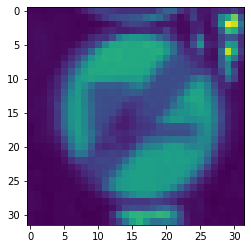

In [43]:
##### 전처리된 이미지 확인

plt.imshow(ds.X[0, :, :, :].reshape(RESIZED_IMAGE))
print(ds.y[0, :])

plt.imshow(ds.X[-1, :, :, :].reshape(RESIZED_IMAGE))
print(ds.y[-1, :])

In [49]:
##### 훈련 데이터와 테스트 데이터의 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(range(ds.X.shape[0]), ds.y, 
                                                    test_size=0.25, random_state=101)
# print(len(X_train), len(X_test))
np.array(X_train).shape

(29406,)